In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline   
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [37]:
# Example: Data Preparation
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('OnlineRetail.csv', encoding='latin1')

# Drop rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Clean data (e.g., remove canceled transactions)
df = df[df['InvoiceNo'].str.startswith('C') == False]

In [38]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [40]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [41]:
# Example: Feature Engineering
# Assuming 'InvoiceDate' is in datetime format
#Create features like recency, frequency, and monetary value (RFM) based on customer behavior.
#Calculate total spending per customer.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert to datetime
df['Recency'] = (pd.to_datetime('2024-05-01') - df['InvoiceDate']).dt.days

# Group by CustomerID and calculate features
rfm_df = df.groupby('CustomerID').agg({
    'Recency': 'min',
    'InvoiceNo': 'count',
    'UnitPrice': 'sum'
}).rename(columns={'InvoiceNo': 'Frequency', 'UnitPrice': 'Monetary'})

# Calculate average basket size (optional)
rfm_df['AvgBasketSize'] = rfm_df['Monetary'] / rfm_df['Frequency']


In [42]:
rfm_df.columns

Index(['Recency', 'Frequency', 'Monetary', 'AvgBasketSize'], dtype='object')

<Axes: >

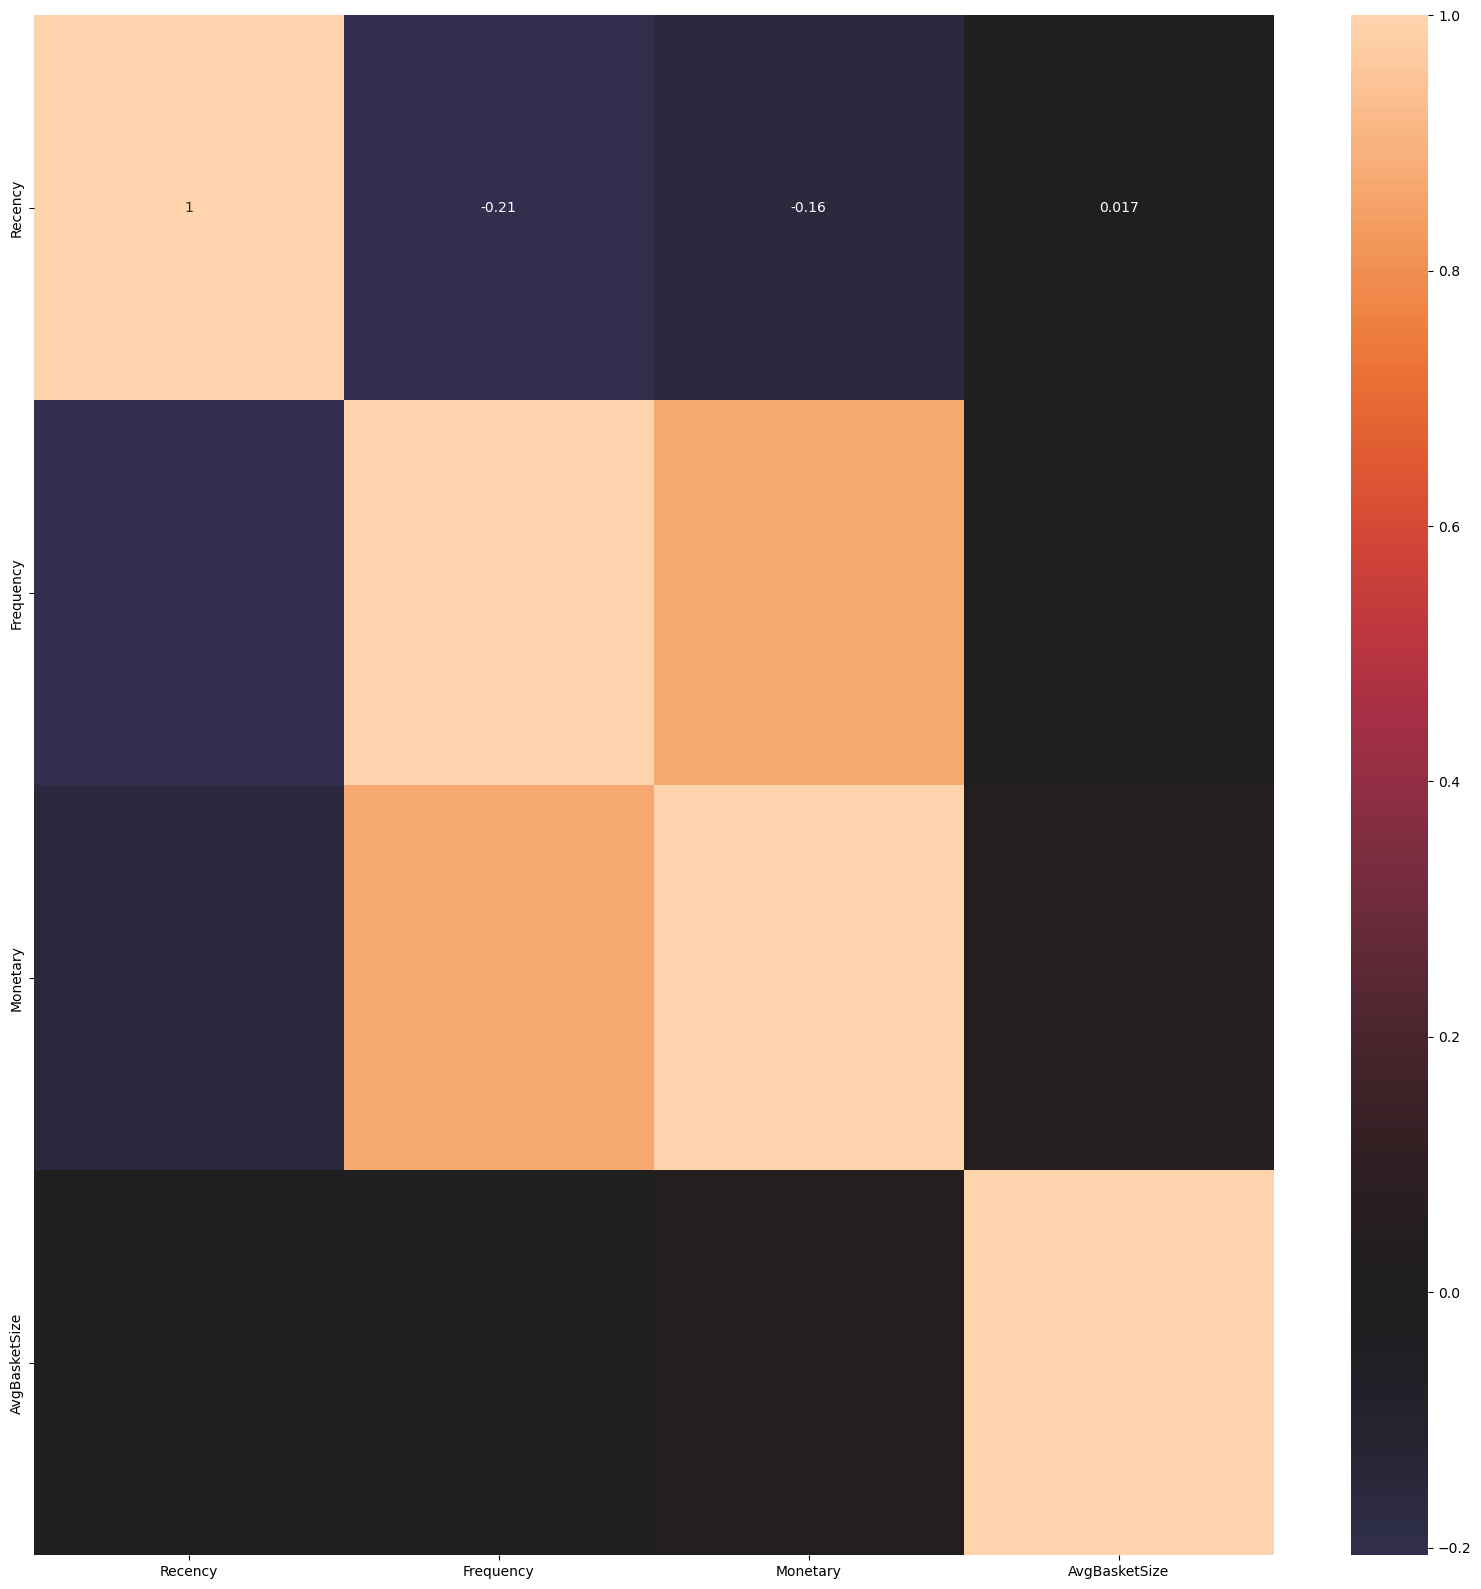

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat= rfm_df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True,center=0)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

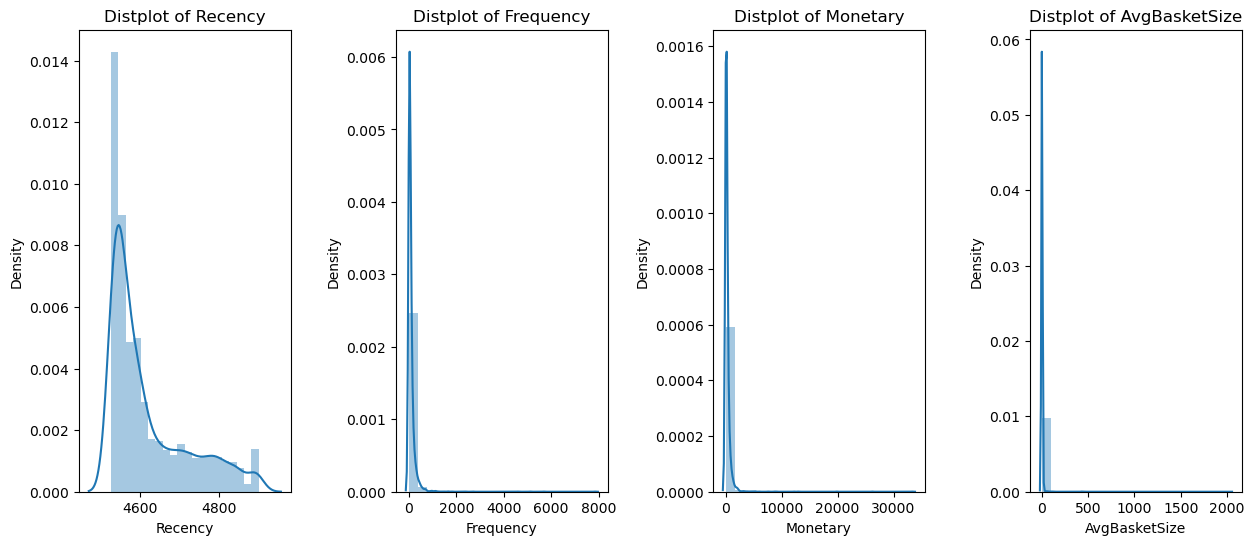

In [7]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Recency' , 'Frequency' , 'Monetary','AvgBasketSize']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(rfm_df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

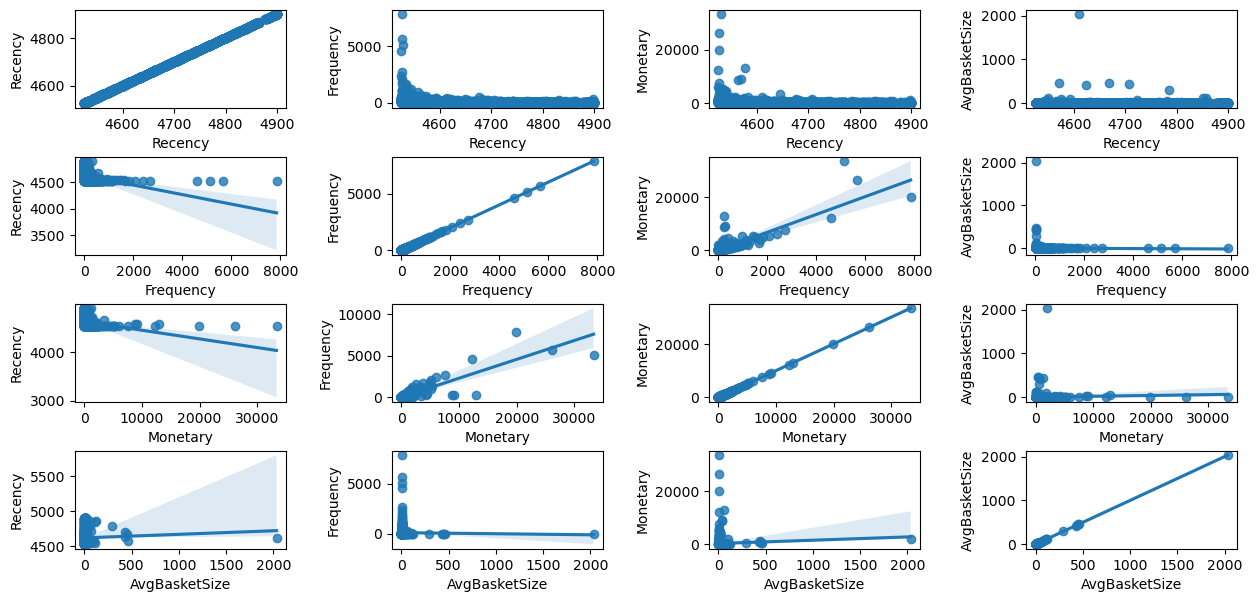

In [8]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Recency' , 'Frequency' , 'Monetary','AvgBasketSize']:
    for y in ['Recency' , 'Frequency' , 'Monetary','AvgBasketSize']:
        n += 1
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = rfm_df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
train_X, test_X = train_test_split(rfm_df, test_size=0.2, random_state=42)

print(len(train_X), "train +", len(test_X), "test")

3471 train + 868 test


In [10]:
# lets take copy of the data 
df = train_X.copy()

In [11]:
# Create scaler: scaler
scaler = StandardScaler()
scaler.fit(rfm_df)
# transform
data_scaled = scaler.transform(df)
data_scaled[0]

array([ 1.18962998, -0.02495422, -0.11248898, -0.06706536])

In [12]:
pca = PCA()

# fit PCA
pca.fit(data_scaled)
# PCA features
features = range(pca.n_components_)
# PCA transformed data
data_pca = pca.transform(data_scaled)
pca.explained_variance_ratio_

array([0.43448933, 0.3115757 , 0.22764568, 0.02628929])

In [13]:
# Example: PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# Apply PCA
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

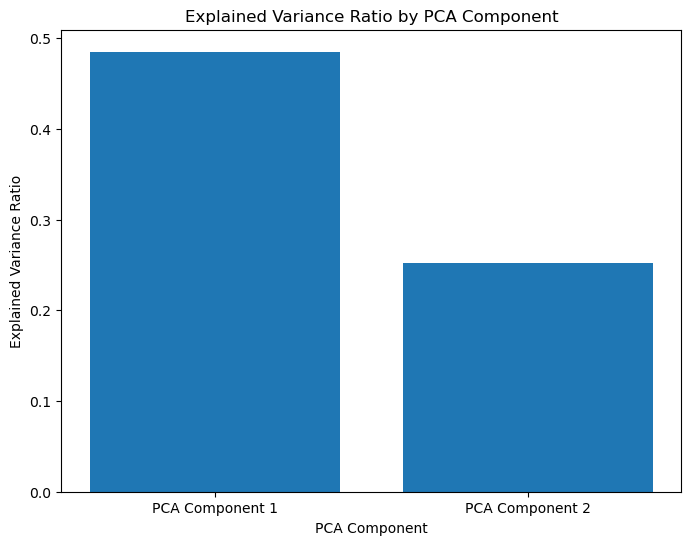

In [14]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(['PCA Component 1', 'PCA Component 2'], pca.explained_variance_ratio_)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('PCA Component')
plt.title('Explained Variance Ratio by PCA Component')
plt.show()

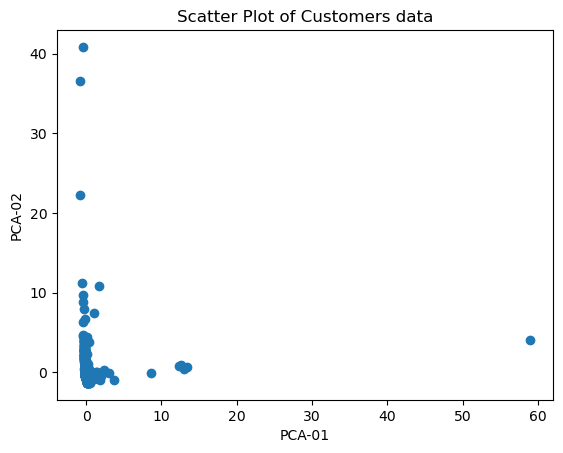

In [15]:
xs = data_pca[:,0]
ys = data_pca[:,1]
plt.scatter(ys, xs)

plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

In [16]:
dfpca=pd.DataFrame(rfm_pca,columns=pca.get_feature_names_out())
dfpca

,pca0,pca1
0,-1.105644,0.557478
1,0.656969,-0.294364
2,-0.218934,-0.024499
3,0.386858,-0.078764
4,-0.967236,0.598006
...,...,...
4334,-0.914557,0.525443
4335,-0.674433,0.264806
4336,-0.187044,-0.250666
4337,2.943798,-0.244379


Elbow Method to determine the number of clusters to be formed:


C:\Users\DELL\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\DELL\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


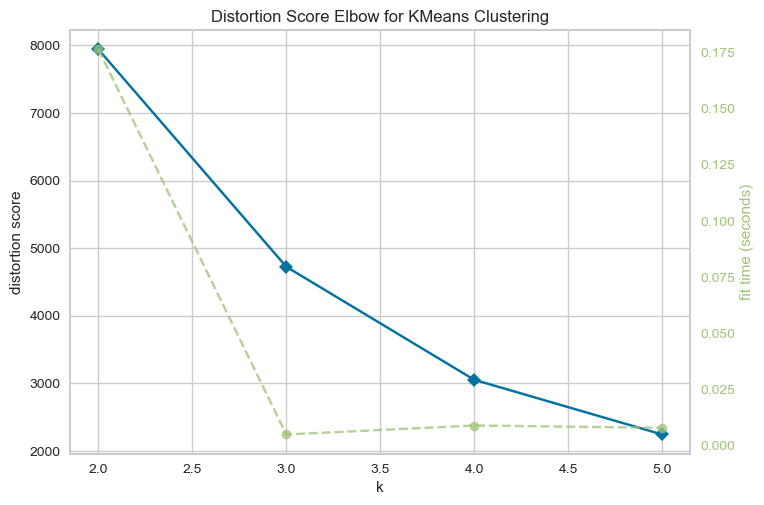

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=5)
Elbow_M.fit(rfm_pca)
Elbow_M.show()

In [18]:
#  finding elbow value for different number of clusters.
X = data_pca
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++',random_state= 42 ) )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)    


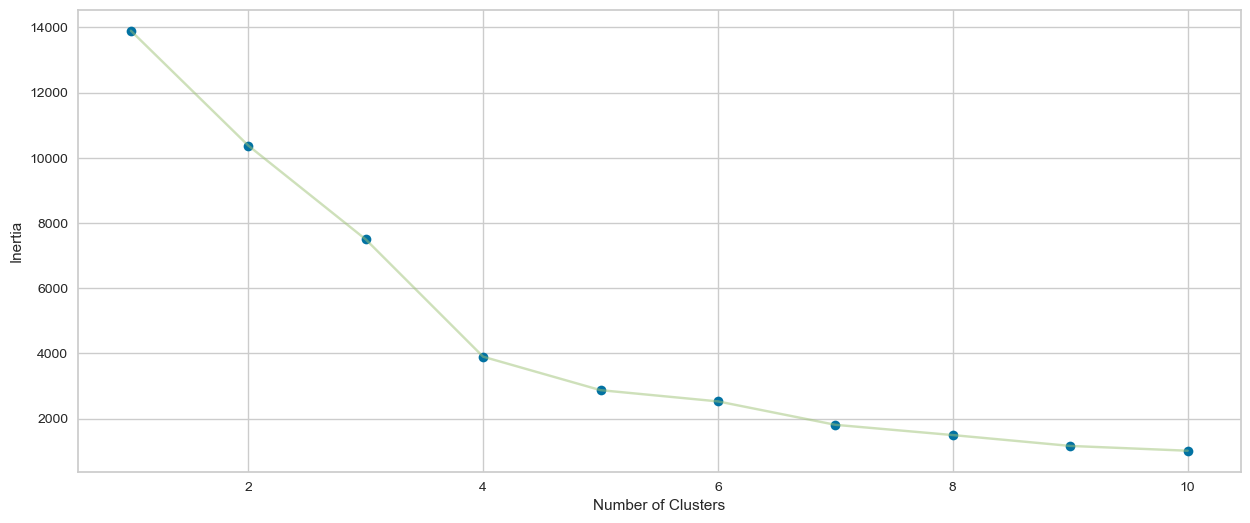

In [19]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [20]:
# KMeans model
# 5 clusters to start with
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [21]:
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm_df.head()

,Recency,Frequency,Monetary,AvgBasketSize,Cluster
CustomerID,,,,,
12346.0,4851,1,1.04,1.040000,0
12347.0,4528,182,481.21,2.644011,1
12348.0,4601,31,178.71,5.764839,1
12349.0,4544,73,605.10,8.289041,1
12350.0,4836,17,65.30,3.841176,0


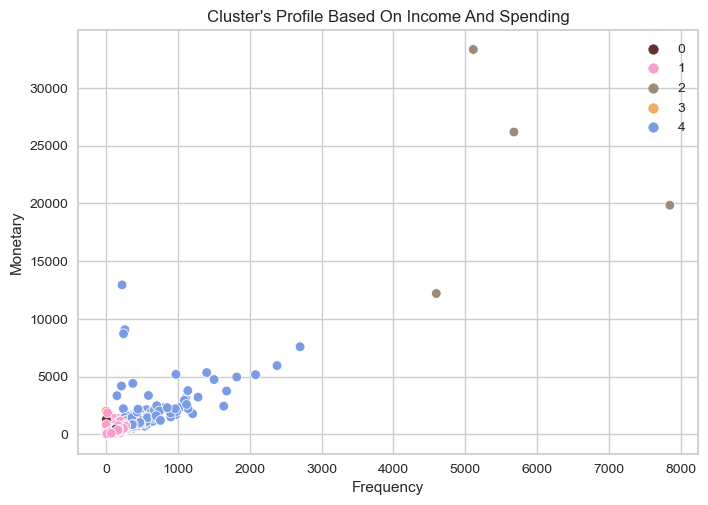

In [22]:
pal = ["#682F2F","#fb9ccd", "#9F8A78","#F3AB60","#799ce4"]
pl = sns.scatterplot(data = rfm_df,x=rfm_df["Frequency"], y=rfm_df["Monetary"],hue=rfm_df["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 800x550 with 0 Axes>

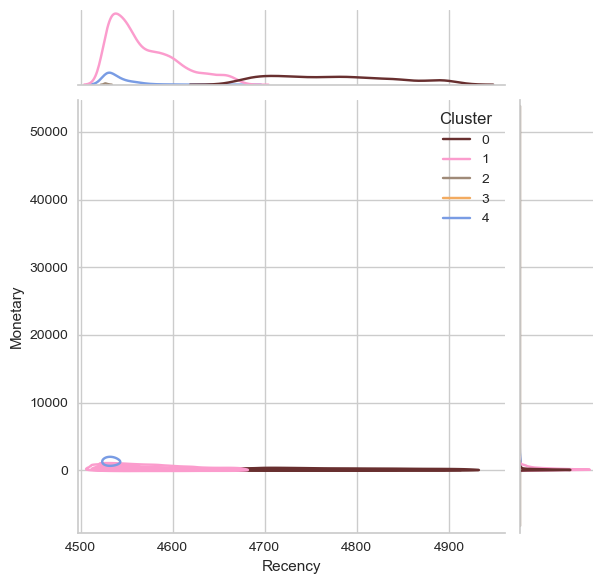

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 800x550 with 0 Axes>

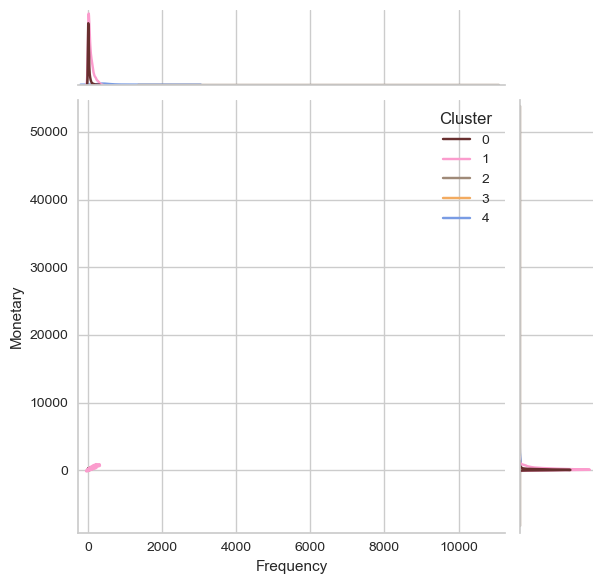

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 800x550 with 0 Axes>

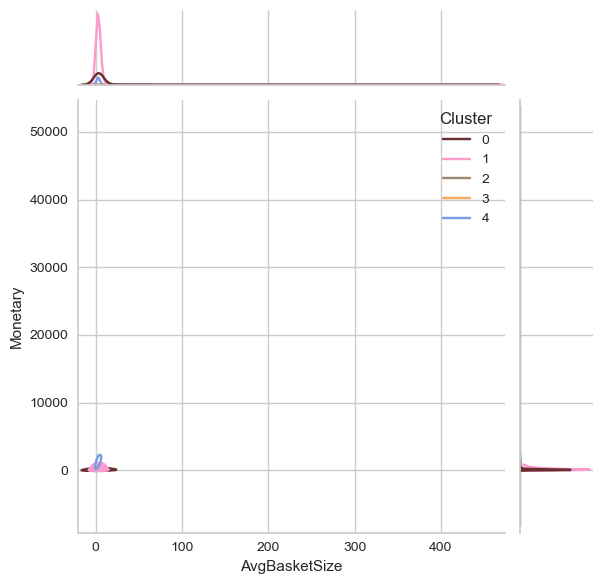

In [23]:
x = ['Recency' , 'Frequency' ,'AvgBasketSize']
for i in x:
    plt.figure()
    sns.jointplot(x=rfm_df[i], y=rfm_df["Monetary"], hue =rfm_df["Cluster"], kind="kde", palette=pal)
    plt.show()

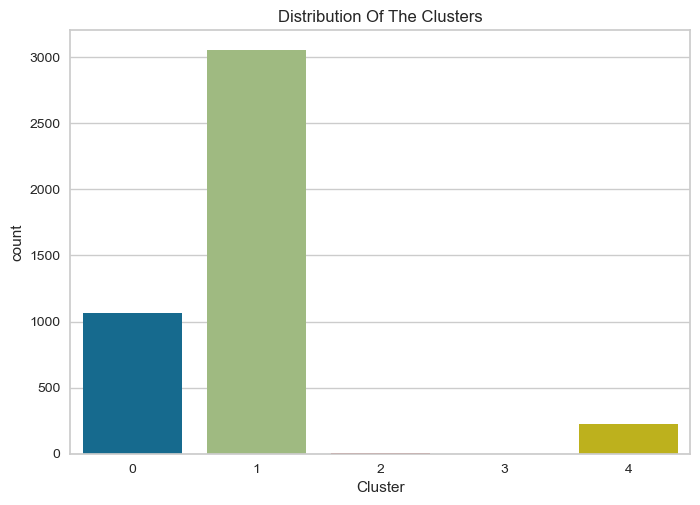

In [24]:
pl = sns.countplot(x=rfm_df["Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

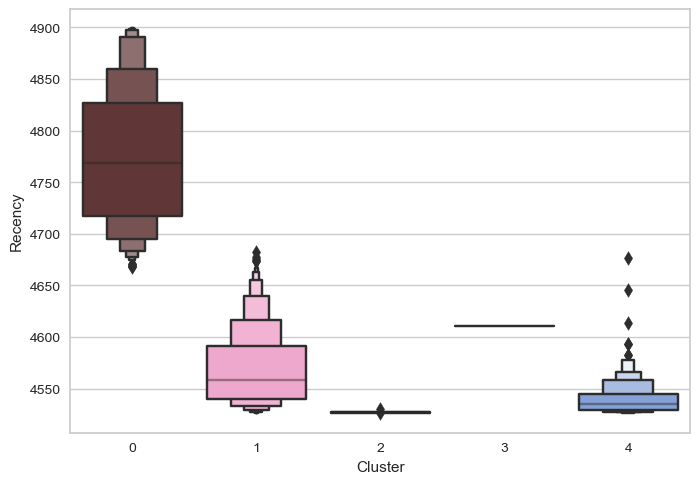

In [25]:
plt.figure()
pl=sns.boxenplot(y=rfm_df["Recency"],x=rfm_df["Cluster"], palette= pal)
plt.show()

In [26]:
from sklearn.pipeline import make_pipeline  
# Build pipeline
pipeline = make_pipeline(scaler, pca, kmeans)
# fit the model to the scaled dataset
model_fit = pipeline.fit(df)
model_fit

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=5, random_state=0))])

In [27]:
# return a label for each data point based on their cluster
labels = model_fit.predict(df)
train_X['Clusters'] = labels

In [28]:
# Number of data points for each feature in each cluster
train_X.groupby('Clusters').count()

,Recency,Frequency,Monetary,AvgBasketSize
Clusters,,,,
0,2318,2318,2318,2318
1,3,3,3,3
2,1,1,1,1
3,227,227,227,227
4,922,922,922,922


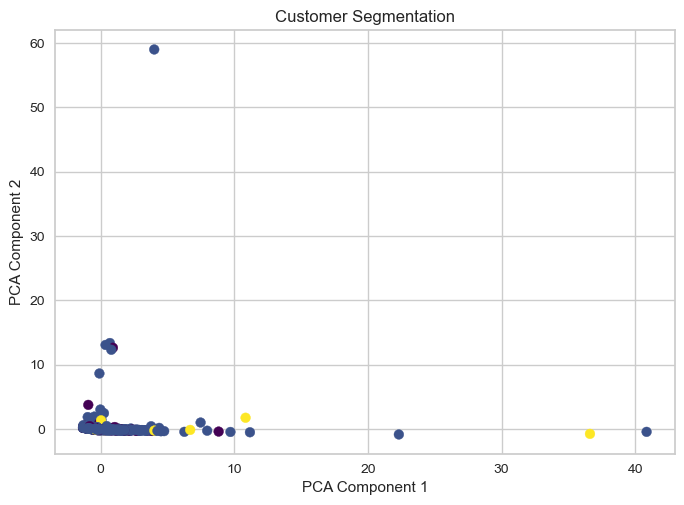

In [29]:
# Example: Scatter Plot
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=rfm_df['Cluster'].head(3471), cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation')
plt.show()


In [30]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(rfm_scaled, rfm_df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.61


In [31]:

PCA_ds = pd.DataFrame(pca.transform(rfm_scaled), columns=(["col1","col2"]))
x =PCA_ds["col1"]
y =PCA_ds["col2"]

In [32]:
from sklearn.cluster import AgglomerativeClustering
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(rfm_pca)
dfpca["Cluster"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
rfm_df["Cluster"]= yhat_AC

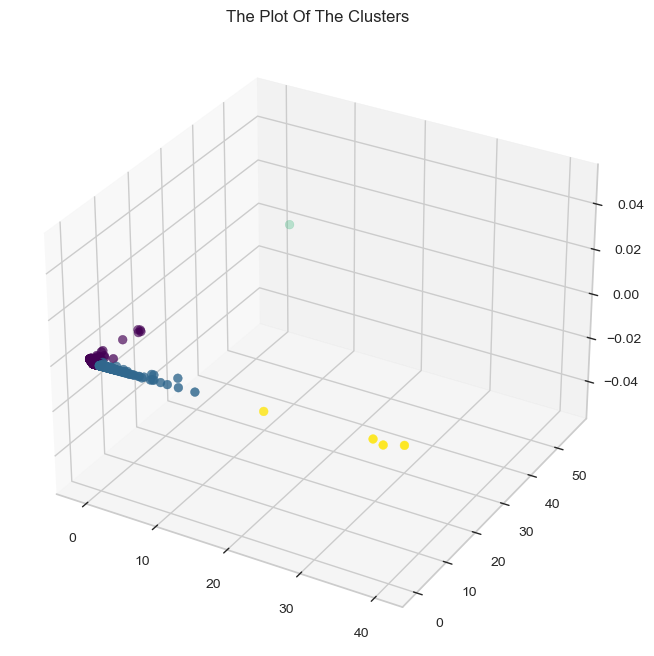

In [33]:
#Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d', label="bla")

# Change the colormap here (e.g., "viridis", "coolwarm", etc.)
ax.scatter(x, y, s=40, c=dfpca["Cluster"], marker='o', cmap="viridis")

ax.set_title("The Plot Of The Clusters")
plt.show()

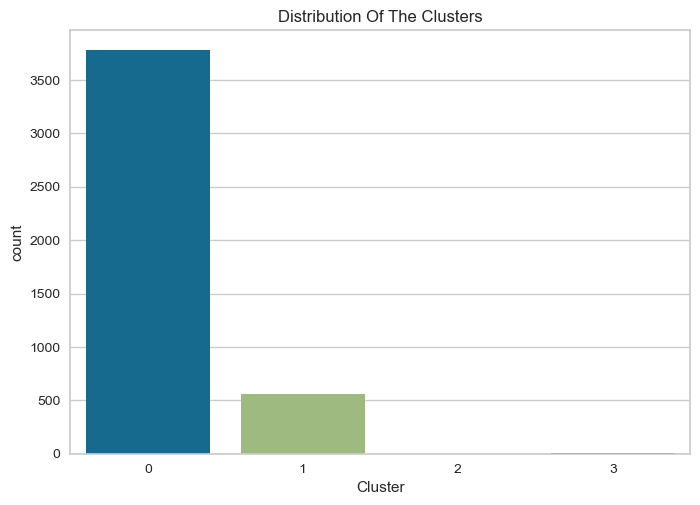

In [34]:
pl = sns.countplot(x=rfm_df["Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()